## Load Data

In [3]:
import json

with open("../preprocessing/AutismPhenotype.json") as schema_file:    
    pheno_schema = json.load(schema_file)

In [4]:
import csv
import numpy as np

with open("../data/all_samples_filtered.csv") as f:
    reader = csv.reader(f)
    header = next(reader)[1:]
    sample_names, data = zip(*[(x[0], x[1:]) for x in reader])
    
data = np.asarray(data)
print(data.shape)

(13493, 123)


In [5]:
with open("../data/all_samples_filtered_labels.csv") as f:
    reader = csv.reader(f)
    label_header = next(reader)[1:]
    _, labels = zip(*[(x[0], x[1:]) for x in reader])

In [28]:
with open("../data/all_samples.csv") as f:
    reader = csv.reader(f)
    all_info_header = next(reader)
    all_info = list(reader)

## Types of ADIR questions

In [7]:
from collections import defaultdict

datatype_to_q = defaultdict(set)

for key, value in pheno_schema['definitions']['ADIR']['properties'].items():
    if 'data-type' in value:
        if key.endswith('a'):
            datatype_to_q['categorical a'].add(key[:-1])
        elif '.' in key:
            datatype_to_q['ordinal double'].add(key.split('.')[0])
        else:
            datatype_to_q[value['data-type']].add(key)
        
for key, value in datatype_to_q.items():
    print(key, len(value), value, sep='\t')


score	16	{'C2', 'A1', 'C1', 'C4', 'B4', 'restricted_repetitive_behavior', 'communication', 'A3', 'social_interaction', 'A2', 'A4', 'B1', 'B2', 'B3', 'abnormality_evident_before_3_years', 'C3'}
interval	14	{'Q10', 'Q19', 'Q26', 'Q02', 'Q87', 'Q07', 'Q06', 'Q08', 'Q17', 'Q28', 'Q04', 'Q86', 'Q05', 'Q09'}
categorical a	145	{'Q62.1', 'Q12', 'Q71.2', 'Q91.1', 'Q81.1', 'Q79.2', 'Q43.2', 'Q66.2', 'Q56.1', 'Q38.1', 'Q51.1', 'Q13', 'Q63.2', 'Q70.2', 'Q86', 'Q61.1', 'Q77.1', 'Q34.2', 'Q29.1', 'Q62.2', 'Q90.2', 'Q51.2', 'Q15', 'Q31.1', 'Q52.2', 'Q76.1', 'Q35.1', 'Q55.2', 'Q42.2', 'Q02', 'Q71.1', 'Q91.2', 'Q05', 'Q92.1', 'Q26', 'Q92.2', 'Q67.1', 'Q80.2', 'Q49.2', 'Q68.2', 'Q32.1', 'Q37.2', 'Q65.2', 'Q81.2', 'Q56.2', 'Q84.1', 'Q09', 'Q48.2', 'Q20', 'Q79.1', 'Q37.1', 'Q70.1', 'Q18', 'Q10', 'Q84.2', 'Q31.2', 'Q89.2', 'Q04', 'Q53.1', 'Q54.1', 'Q93.2', 'Q52.1', 'Q75.1', 'Q34.1', 'Q46.1', 'Q07', 'Q33.2', 'Q69.1', 'Q90.1', 'Q16', 'Q33.1', 'Q47.2', 'Q85.1', 'Q08', 'Q39.2', 'Q89.1', 'Q80.1', 'Q93.1', 'Q65.

## Types of ADOS questions

In [8]:
from collections import defaultdict

datatype_to_q = defaultdict(set)

for key, value in pheno_schema['definitions']['ADOS']['properties'].items():
    if 'data-type' in value:
        if key.endswith('a'):
            datatype_to_q['categorical a'].add(key[:-1])
        elif '.' in key:
            datatype_to_q['ordinal double'].add(key.split('.')[0])
        else:
            datatype_to_q[value['data-type']].add(key)
        
for key, value in datatype_to_q.items():
    print(key, len(value), value, sep='\t')


score	3	{'social_interaction', 'restricted_repetitive_behavior', 'communication'}
ordinal	46	{'QE02', 'QA08', 'QB13', 'QB10', 'QB08', 'QD01', 'QB12', 'QB04', 'QB19', 'QA11', 'QD05', 'QA09', 'QA10', 'QB17', 'QB18', 'QA07', 'QD04', 'QC01', 'QE03', 'QD03', 'QB22', 'QA02', 'QB11', 'QB14', 'QA05', 'QB20', 'QB02', 'QA04', 'QB05', 'QA03', 'QB07', 'QB01', 'QC02', 'QA01', 'QD02', 'QB06', 'QB21', 'QA12', 'QB09', 'QE01', 'QB03', 'QA06', 'QB15', 'QB23', 'QB16', 'QA13'}


In [9]:
feature_mapping = {
	'ADOS_Module1': {
		"QA01": "QA01", "QA02": "QA11", "QA03": "QA02", "QA04": "QA03", "QA05": "QA04", 
		"QA06": "QA12", "QA07": "QA07", "QA08": "QA10",
		"QB01": "QB01", "QB02": "QB17", "QB03": "QB02", "QB04": "QB16", "QB05": "QB04",
		"QB06": "QB07", "QB07": "QB19", "QB08": "QB21", "QB09": "QB08", "QB10": "QB10", 
		"QB11": "QB09", "QB12": "QB13", "QB13.1": "QB11", "QB13.2": "QB23", "QB14": "QB14", "QB15": "QB22",
		"QB16": "QB15",
		"QC01": "QC01", "QC02": "QC02",
		"QD01": "QD01", "QD02": "QD02", "QD03": "QD03", "QD04": "QD04",
		"QE01": "QE01", "QE02": "QE02", "QE03": "QE03"
	},
	'ADOS_Module2': {
		"QA01": "QA01", "QA02": "QA02", "QA03": "QA03", "QA04": "QA04", "QA05": "QA09",
		"QA06": "QA07", "QA07": "QA10",
		"QB01": "QB01", "QB02": "QB02", "QB03": "QB04", "QB04": "QB07", "QB05": "QB08",
		"QB06": "QB10", "QB07": "QB09", "QB08": "QB13", "QB09.1": "QB11", "QB09.2": "QB23", "QB10": "QB14",
		"QB11": "QB12", "QB12": "QB15", 
		"QC01": "QC01", "QC02": "QC02",
		"QD01": "QD01", "QD02": "QD02", "QD03": "QD03", "QD04": "QD04",
		"QE01": "QE01", "QE02": "QE02", "QE03": "QE03"
	},
	'ADOS_Module3': {
		"QA01": "QA01", "QA02": "QA02", "QA03": "QA03", "QA04": "QA04", "QA05": "QA05", 
		"QA06": "QA06", "QA07": "QA08", "QA08": "QA09", "QA09": "QA10",
		"QB01": "QB01", "QB02": "QB02", "QB03": "QB03", "QB04": "QB04", "QB05": "QB05",
		"QB06": "QB06", "QB07": "QB13", "QB08": "QB11", "QB09": "QB14", "QB10": "QB12",
		"QB11": "QB15",
		"QC01": "QC02",
		"QD01": "QD01", "QD02": "QD02", "QD03": "QD03", "QD04": "QD04", "QD05": "QD05",
		"QE01": "QE01", "QE02": "QE02", "QE03": "QE03"

	},
	'ADOS_Module4': {
		"QA01": "QA01", "QA02": "QA02", "QA03": "QA03", "QA04": "QA04", "QA05": "QA05", 
		"QA06": "QA06", "QA07": "QA08", "QA08": "QA09", "QA09": "QA10", "QA10": "QA13",
		"QB01": "QB01", "QB02": "QB02", "QB03": "QB03", "QB04": "QB04", "QB05": "QB18",
		"QB06": "QB05", "QB07": "QB06", "QB08": "QB20", "QB09": "QB13", "QB10": "QB11",
		"QB11": "QB14", "QB12": "QB12", "QB13": "QB15",
		"QC01": "QC02",
		"QD01": "QD01", "QD02": "QD02", "QD03": "QD03", "QD04": "QD04", "QD05": "QD05",
		"QE01": "QE01", "QE02": "QE02", "QE03": "QE03"
	}
}

agg_mod_to_mods = defaultdict(dict)

for module in feature_mapping.keys():
    for key, value in feature_mapping[module].items():
        agg_mod_to_mods[value][module] = key

for key in sorted(agg_mod_to_mods.keys()):
    values = agg_mod_to_mods[key]
    print(key, '' if 'ADOS_Module1' not in values else values['ADOS_Module1'],
         '' if 'ADOS_Module2' not in values else values['ADOS_Module2'],
         '' if 'ADOS_Module3' not in values else values['ADOS_Module3'],
         ('' if 'ADOS_Module4' not in values else values['ADOS_Module4']) + '\\\\', sep=' & ')


QA01 & QA01 & QA01 & QA01 & QA01\\
QA02 & QA03 & QA02 & QA02 & QA02\\
QA03 & QA04 & QA03 & QA03 & QA03\\
QA04 & QA05 & QA04 & QA04 & QA04\\
QA05 &  &  & QA05 & QA05\\
QA06 &  &  & QA06 & QA06\\
QA07 & QA07 & QA06 &  & \\
QA08 &  &  & QA07 & QA07\\
QA09 &  & QA05 & QA08 & QA08\\
QA10 & QA08 & QA07 & QA09 & QA09\\
QA11 & QA02 &  &  & \\
QA12 & QA06 &  &  & \\
QA13 &  &  &  & QA10\\
QB01 & QB01 & QB01 & QB01 & QB01\\
QB02 & QB03 & QB02 & QB02 & QB02\\
QB03 &  &  & QB03 & QB03\\
QB04 & QB05 & QB03 & QB04 & QB04\\
QB05 &  &  & QB05 & QB06\\
QB06 &  &  & QB06 & QB07\\
QB07 & QB06 & QB04 &  & \\
QB08 & QB09 & QB05 &  & \\
QB09 & QB11 & QB07 &  & \\
QB10 & QB10 & QB06 &  & \\
QB11 & QB13.1 & QB09.1 & QB08 & QB10\\
QB12 &  & QB11 & QB10 & QB12\\
QB13 & QB12 & QB08 & QB07 & QB09\\
QB14 & QB14 & QB10 & QB09 & QB11\\
QB15 & QB16 & QB12 & QB11 & QB13\\
QB16 & QB04 &  &  & \\
QB17 & QB02 &  &  & \\
QB18 &  &  &  & QB05\\
QB19 & QB07 &  &  & \\
QB20 &  &  &  & QB08\\
QB21 & QB08 &  &  & \\
QB22 & QB1

## Response distribution

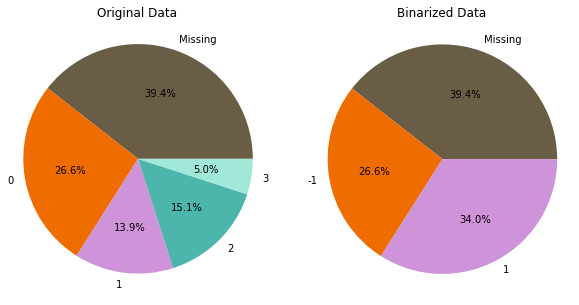

In [10]:
import matplotlib.pyplot as plt
unique, counts = np.unique(data, return_counts=True)
counts[3] += counts[4]
unique = ["Missing", "0", "1", "2", "3"]
counts = [counts[5], counts[0], counts[1], counts[2], counts[3]]
colors = ["#695d46", "#ef6c00", "#ce93d8", "#4db6ac", "#a1e8d9"]
dict(zip(unique, counts/sum(counts)))

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.pie(counts/sum(counts), labels=unique, autopct='%1.1f%%', colors=colors)
ax1.set_title('Original Data')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

unique = ["Missing", "-1", "1"]
counts = [counts[0], counts[1], counts[2]+counts[3]+counts[4]]
ax2.pie(counts/sum(counts), labels=unique, autopct='%1.1f%%', colors=colors)
ax2.set_title('Binarized Data')
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


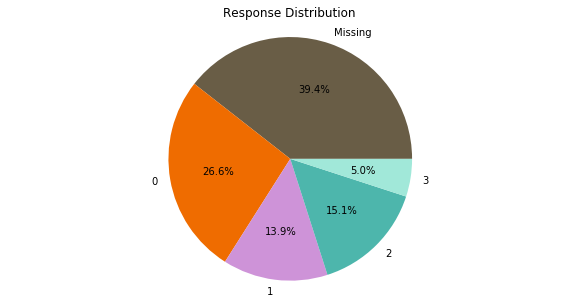

In [11]:
import matplotlib.pyplot as plt
unique, counts = np.unique(data, return_counts=True)
counts[3] += counts[4]
unique = ["Missing", "0", "1", "2", "3"]
counts = [counts[5], counts[0], counts[1], counts[2], counts[3]]
colors = ["#695d46", "#ef6c00", "#ce93d8", "#4db6ac", "#a1e8d9"]
dict(zip(unique, counts/sum(counts)))

fig1, (ax1) = plt.subplots(1, 1, figsize=(10, 5))
ax1.pie(counts/sum(counts), labels=unique, autopct='%1.1f%%', colors=colors)
ax1.set_title('Response Distribution')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [12]:
print(data.shape)

(13493, 123)


In [13]:
print(label_header)

['diagnosis', 'ADIR:diagnosis', 'ADIR:diagnosis_num_nulls', 'ADIR:communication', 'ADIR:social_interaction', 'ADIR:restricted_repetitive_behavior', 'ADOS:diagnosis', 'ADOS:diagnosis_num_nulls', 'ADOS:communication', 'ADOS:social_interaction', 'ADOS:restricted_repetitive_behavior', 'cpea_diagnosis', 'cpea_adjusted_diagnosis']


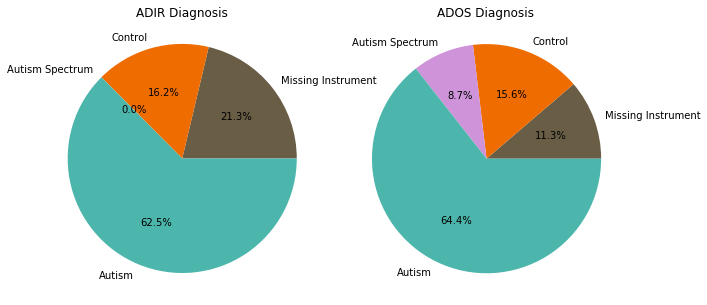

In [14]:
import matplotlib.pyplot as plt
from collections import Counter

adir_c = Counter([x[1] for x in labels])
ados_c = Counter([x[6] for x in labels])
keys = ['None', 'Control', 'Autism Spectrum', 'Autism']

fig1, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
ax1.pie([adir_c[k] for k in keys], labels=[k if k != 'None' else 'Missing Instrument' for k in keys], autopct='%1.1f%%', colors=colors)
ax1.set_title('ADIR Diagnosis')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

ax2.pie([ados_c[k] for k in keys], labels=[k if k != 'None' else 'Missing Instrument' for k in keys], autopct='%1.1f%%', colors=colors)
ax2.set_title('ADOS Diagnosis')
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


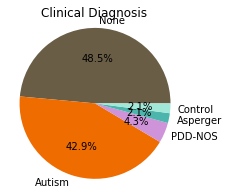

In [36]:
import matplotlib.pyplot as plt
from collections import Counter

diag_c = Counter([x[1] for x in all_info])
keys = [k for k, v in diag_c.most_common()]

fig1, (ax1) = plt.subplots(1, 1, figsize=(3, 3))
ax1.pie([diag_c[k] for k in keys], labels=keys, autopct='%1.1f%%', colors=colors)
ax1.set_title('Clinical Diagnosis')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


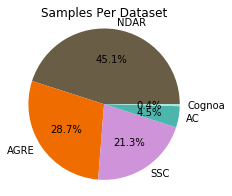

In [21]:
dataset_c = Counter([x[5] for x in all_info])
keys = list([k for k, v in dataset_c.most_common()])

abbrev = {'Autism Consortium': 'AC', 'Simons Simplex Collection': 'SSC', 'AGRE': 'AGRE', 'National Database for Autism Research': 'NDAR', 'Cognoa': 'Cognoa'}
fig1, (ax1) = plt.subplots(1, 1, figsize=(3, 3))
ax1.pie([dataset_c[k] for k in keys], labels=[abbrev[k] for k in keys], autopct='%1.1f%%', colors=colors)
ax1.set_title('Samples Per Dataset')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


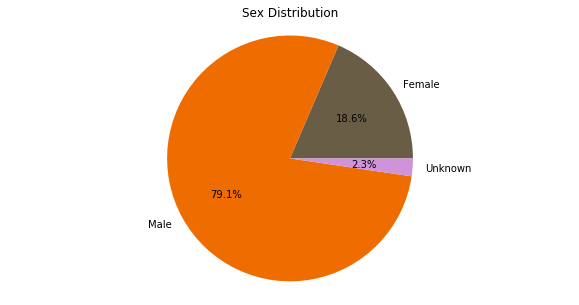

In [23]:
gender_c = Counter([x[9] for x in all_info])
keys = list(gender_c.keys())

fig1, (ax1) = plt.subplots(1, 1, figsize=(10, 5))
ax1.pie([gender_c[k] for k in keys], labels=[k if k != 'None' else 'Unknown' for k in keys], autopct='%1.1f%%', colors=colors)
ax1.set_title('Sex Distribution')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


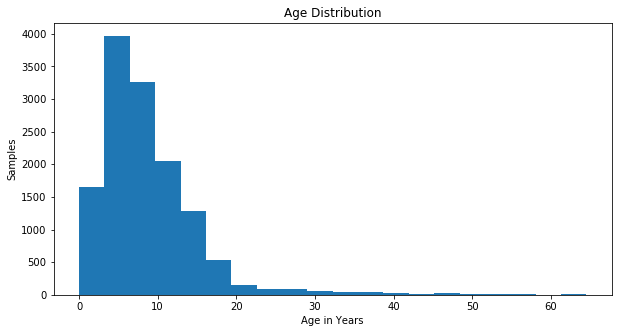

In [29]:
ages = [1.0*int(x[0])/12 for x in all_info if x[0] not in ['None', '']]
fig1, (ax1) = plt.subplots(1, 1, figsize=(10, 5))
ax1.hist(ages, bins=20)
ax1.set_title('Age Distribution')
ax1.set_xlabel('Age in Years')
ax1.set_ylabel('Samples')

plt.show()


In [30]:
print(adir_c['None'], ados_c['None'], len([x for x in labels if x[1] != 'None' and x[6] != 'None']))


2872 1521 9100


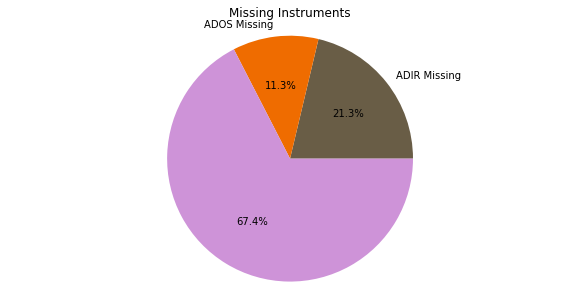

In [31]:
fig1, (ax1) = plt.subplots(1, 1, figsize=(10, 5))
ax1.pie([adir_c['None'], ados_c['None'], len([x for x in labels if x[1] != 'None' and x[6] != 'None'])], labels=['ADIR Missing', 'ADOS Missing', ''], autopct='%1.1f%%', colors=colors)
ax1.set_title('Missing Instruments')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


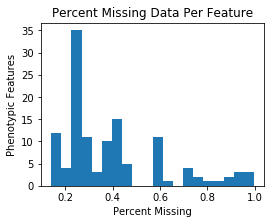

In [32]:
perc_missing = np.sum(data=='None', axis=0)/np.shape(data)[0]
fig1, (ax1) = plt.subplots(1, 1, figsize=(4, 3))
ax1.hist(perc_missing, bins=20)
ax1.set_title('Percent Missing Data Per Feature')
ax1.set_xlabel('Percent Missing')
ax1.set_ylabel('Phenotypic Features')

plt.show()